In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
%matplotlib inline

In [5]:
transactions = pd.read_csv('./user_transactions.csv')
user_base = pd.read_csv('./user_base_part1_edit.csv')
user_label = pd.read_csv('./user_label_branch_edit.csv')

In [6]:
user_label.head(2)

,user_id,number_of_cards,branch_code,default_flag
0,1,2,i,0
1,2,2,a,0


In [7]:
user_label.describe()

,user_id,number_of_cards,default_flag
count,15645.000000,15645.000000,15645.000000
mean,7823.000000,2.506040,0.090508
std,4516.466816,1.012536,0.286918
min,1.000000,1.000000,0.000000
25%,3912.000000,2.000000,0.000000
50%,7823.000000,2.000000,0.000000
75%,11734.000000,3.000000,0.000000
max,15645.000000,16.000000,1.000000


In [8]:
user_label.groupby("branch_code").agg({"user_id": "count"}).reset_index()

,branch_code,user_id
0,a,8900
1,b,1351
2,c,334
3,d,205
4,e,649
5,f,1697
6,g,566
7,h,367
8,i,991
9,j,410


In [9]:
user_label.groupby("default_flag").agg({"user_id": "count"}).reset_index()

,default_flag,user_id
0,0,14229
1,1,1416


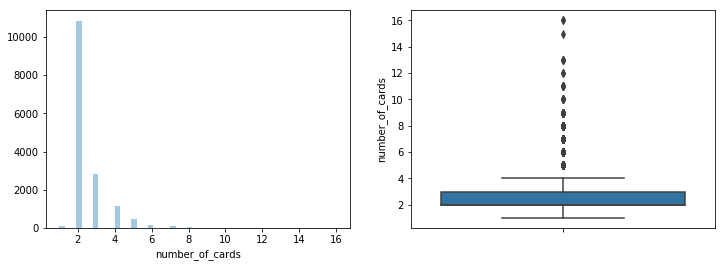

In [10]:
_ = plt.figure(figsize=(12, 4))
_ = plt.subplot(121)
_ = sns.distplot(user_label.number_of_cards, kde=False)

_ = plt.subplot(122)
_ = sns.boxplot(x='number_of_cards', data=user_label, orient='v')

In [11]:
# divide monetary value by 10000 so that it is easier to read
combine = (
    transactions
    .merge(user_base, on='user_id', how='left')
    .merge(user_label, on='user_id', how='left')
    [['user_id', 'branch_code', 'default_flag', 'number_of_cards', 'outstanding', 'credit_limit', 'bill', 'total_cash_usage',
       'total_retail_usage', 'total_usage', 'total_usage_per_limit', 'total_3mo_usage_per_limit',
       'total_6mo_usage_per_limit', 'remaining_bill', 'payment_ratio', 'payment_ratio_3month', 'payment_ratio_6month','overlimit_percentage',
       'delinquency_score', 'years_since_card_issuing',
       'remaining_bill_per_number_of_cards', 'remaining_bill_per_limit', 'utilization_3month', 'utilization_6month']]
    .pipe(lambda x: x.assign(outstanding=x.outstanding/10000))
    .pipe(lambda x: x.assign(credit_limit=x.credit_limit/10000))
    .pipe(lambda x: x.assign(bill=x.bill/10000))
    .pipe(lambda x: x.assign(total_cash_usage=x.total_cash_usage/10000))
    .pipe(lambda x: x.assign(total_retail_usage=x.total_retail_usage/10000))
    .pipe(lambda x: x.assign(total_usage=x.total_usage/10000))
    .pipe(lambda x: x.assign(remaining_bill=x.remaining_bill/10000))
    .pipe(lambda x: x.assign(remaining_bill_per_number_of_cards=x.remaining_bill_per_number_of_cards/10000))
)

In [12]:
combine[['total_cash_usage', 'total_retail_usage', 'total_usage', 'total_usage_per_limit', 'total_3mo_usage_per_limit', 'total_6mo_usage_per_limit']].describe()

,total_cash_usage,total_retail_usage,total_usage,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit
count,15600.000000,15645.000000,15645.000000,15645.000000,15645.000000,15645.000000
mean,7.457618,202.480595,209.928120,0.108977,0.167157,0.202598
std,61.778729,790.934462,807.325021,0.199740,0.192212,0.274314
min,0.000000,-1566.720000,-1566.720000,-0.632000,-0.126000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.034767,0.032600
50%,0.000000,20.000000,24.380000,0.021700,0.108000,0.117000
75%,0.000000,139.620400,150.747800,0.127143,0.239000,0.285000
max,2884.057200,28500.000000,31400.000000,4.600000,3.490000,8.110000


In [13]:
# assuming total_cash_usage + total_retail_usage = total_usage
# check out assumption
check_assumption1 = (
    combine
    [['total_cash_usage', 'total_retail_usage', 'total_usage']]
    .fillna('x')
    .query("total_cash_usage != 'x'")
    .pipe(lambda x: x.assign(total_usage_check=x.total_cash_usage+x.total_retail_usage-x.total_usage))
)

In [14]:
print("% of rows that does not tally: " + str(round(len(check_assumption1.query("total_usage_check !=0"))/check_assumption1.shape[0] * 100, 1)) + '%')

% of rows that does not tally: 0.3%


In [15]:
check_assumption1.query("total_usage_check !=0")

,total_cash_usage,total_retail_usage,total_usage,total_usage_check
75,70,110.6768,180.6768,2.84217e-14
173,80,25.2665,105.2665,1.42109e-14
594,300,426.9589,726.9589,1.13687e-13
1325,200,109.3785,309.3785,5.68434e-14
1464,20,44.5006,64.5006,-1.42109e-14
2555,88,66.3470,154.3470,-2.84217e-14
2749,50,127.4036,177.4036,-2.84217e-14
2795,30,36.1350,66.1350,-1.42109e-14
2828,350,88.5350,438.5350,-5.68434e-14
3085,150,461.3427,611.3427,-1.13687e-13


In [16]:
print("% of data points where total_retail_usage or total_usage is negative: " + str(round(len(combine.query("total_retail_usage < 0 or total_usage < 0"))/combine.shape[0] * 100, 1)) + '%')

% of data points where total_retail_usage or total_usage is negative: 0.3%


In [17]:
# assumption is correct
# fill missing null values of total_cash_usage with total_usage - total_retail_usage 
# correct rows where total_usage != total_cash_usage + total_retail_usage
# mulitply -1 with values where total_usage or total_retail_usage is negaive
combine = (
    combine
    .fillna({"total_cash_usage": -999})
    .pipe(lambda x: x.assign(total_retail_usage=np.where(x.total_retail_usage<0, -1*x.total_retail_usage, x.total_retail_usage)))
    .pipe(lambda x: x.assign(total_usage=np.where(x.total_usage<0, -1*x.total_usage, x.total_usage)))
    .pipe(lambda x: x.assign(total_cash_usage=np.where(x.total_cash_usage==-999, x.total_usage-x.total_retail_usage, x.total_cash_usage)))
    .pipe(lambda x: x.assign(total_usage_check=x.total_usage-x.total_cash_usage-x.total_retail_usage))
    .pipe(lambda x: x.assign(total_usage=np.where(x.total_usage_check!=0, x.total_cash_usage+x.total_retail_usage, x.total_usage)))
    .drop('total_usage_check', axis=1)
)

In [18]:
# assume total_usage_per_limit is calculated as total_usage/credit_limit
check_assumption2 = (
    combine
    [['credit_limit', 'total_usage', 'total_usage_per_limit']]
    .pipe(lambda x: x.assign(total_usage_per_limit_recal=x.total_usage/x.credit_limit))
    .pipe(lambda x: x.assign(total_usage_per_limit_check=round(x.total_usage_per_limit_recal-abs(x.total_usage_per_limit), 1)))
)

In [19]:
check_assumption2.query("total_usage_per_limit_check != 0")

,credit_limit,total_usage,total_usage_per_limit,total_usage_per_limit_recal,total_usage_per_limit_check
4819,300.0,259.3022,0.602,0.864341,0.3


In [20]:
# other than index 4819, the assumption on the calculation of total_usage_per_limit seems right
# re-calculate total_usage_per_limit using total_usage/credit_limit to get rid of negative values of total_usage_per_limit
# multiply -1 to negative total_3mo_usage_per_limit
combine = (
    combine
    .pipe(lambda x: x.assign(total_usage_per_limit=x.total_usage/x.credit_limit))
    .pipe(lambda x: x.assign(total_3mo_usage_per_limit=np.where(x.total_3mo_usage_per_limit<0, -1*x.total_3mo_usage_per_limit, x.total_3mo_usage_per_limit)))
)

In [21]:
combine[['payment_ratio', 'payment_ratio_3month', 'payment_ratio_6month']].describe()

,payment_ratio,payment_ratio_3month,payment_ratio_6month
count,15645.000000,15645.000000,15645.000000
mean,64.438215,50.496321,81.544782
std,790.320478,1320.816758,1460.736051
min,-18138.000000,-57792.340000,-77056.000000
25%,0.000000,20.200000,21.500000
50%,26.900000,50.000000,65.500000
75%,100.000000,91.200000,100.000000
max,68983.000000,75575.000000,54899.000000


In [22]:
# assuming payment_ratio is calculated as payment_ratio multiply with bill, the payment for each month is outrageous
# median payment_ratio = 26.9, meaning to say that 50% of the users are making payment of more than 27 times their last month bill
# as such, I would assume that the payment_ratio is in percentage and I should divide by 100 to get the real payment_ratio
# for payment_ratio that are negative, I will mulitply by -1
combine = (
    combine
    .pipe(lambda x: x.assign(payment_ratio=x.payment_ratio/100))
    .pipe(lambda x: x.assign(payment_ratio=np.where(x.payment_ratio<0, -1*x.payment_ratio, x.payment_ratio)))
    .pipe(lambda x: x.assign(payment_ratio_3month=x.payment_ratio_3month/100))
    .pipe(lambda x: x.assign(payment_ratio_3month=np.where(x.payment_ratio_3month<0, -1*x.payment_ratio_3month, x.payment_ratio_3month)))
    .pipe(lambda x: x.assign(payment_ratio_6month=x.payment_ratio_6month/100))
    .pipe(lambda x: x.assign(payment_ratio_6month=np.where(x.payment_ratio_6month<0, -1*x.payment_ratio_6month, x.payment_ratio_6month)))
)

In [23]:
combine[['payment_ratio', 'payment_ratio_3month', 'payment_ratio_6month']].describe()

,payment_ratio,payment_ratio_3month,payment_ratio_6month
count,15645.000000,15645.000000,15645.000000
mean,0.701148,1.092672,1.191463
std,7.898371,13.172573,14.581506
min,0.000000,0.000000,0.000000
25%,0.000000,0.207000,0.222000
50%,0.271000,0.501000,0.660000
75%,1.000000,0.921000,1.000000
max,689.830000,755.750000,770.560000


In [24]:
# we can see there are some outliers in payment_ratio, payment_ratio_3month and payment_ratio_6month as the max is 700x times the 75th percentile

In [25]:
# using iqr to spot outliers
def upper_limit(df, column):
    iqr = df['{}'.format(column)].quantile(q=0.75) - df['{}'.format(column)].quantile(q=0.25)
    upper_limit = df['{}'.format(column)].quantile(q=0.75) + 1.5*iqr
    print("upper limit of {} based on 1.5*IQR: ".format(column) + str(upper_limit))

In [26]:
upper_limit(combine, 'payment_ratio')
upper_limit(combine, 'payment_ratio_3month')
upper_limit(combine, 'payment_ratio_6month')

upper limit of payment_ratio based on 1.5*IQR: 2.5
upper limit of payment_ratio_3month based on 1.5*IQR: 1.992
upper limit of payment_ratio_6month based on 1.5*IQR: 2.167


In [27]:
print("% of data points where payment_ratio > 2.5: " + str(round(len(combine.query("payment_ratio > 2.5"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio_3month > 2.5: " + str(round(len(combine.query("payment_ratio_3month > 1.992"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio_6month > 2.5: " + str(round(len(combine.query("payment_ratio_6month > 2.167"))/len(combine)*100, 1)) + '%')

% of data points where payment_ratio > 2.5: 0.7%
% of data points where payment_ratio_3month > 2.5: 1.3%
% of data points where payment_ratio_6month > 2.5: 1.6%


In [28]:
# since the % of outliers is low, I will drop these rows
print("% of data points that will be dropped: " + str(round(len(combine.query("payment_ratio > 2.5 or payment_ratio_3month > 1.992 or payment_ratio_6month > 2.167"))/len(combine)*100, 1)) + '%')
combine = combine.query("payment_ratio <= 2.5 and payment_ratio_3month <= 1.992 and payment_ratio_6month <= 2.167")

% of data points that will be dropped: 2.8%


In [29]:
print("% of data points where payment_ratio equals to 0: " + str(round(len(combine.query("payment_ratio == 0"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio equals to 0: " + str(round(len(combine.query("payment_ratio_3month == 0"))/len(combine)*100, 1)) + '%')
print("% of data points where payment_ratio equals to 0: " + str(round(len(combine.query("payment_ratio_6month == 0"))/len(combine)*100, 1)) + '%')

% of data points where payment_ratio equals to 0: 31.0%
% of data points where payment_ratio equals to 0: 3.0%
% of data points where payment_ratio equals to 0: 5.1%


In [30]:
# we can also observed that roughly 31% of the data have a payment_ratio equal to 0. this is quite unlikely as this is not observed in payment_ratio_3month and payment_ratio_6month
# I will assume that these data points are erroneous and will replace them with values of payment_ratio_3months 
combine = (
    combine
    .pipe(lambda x: x.assign(payment_ratio=np.where(x.payment_ratio==0, x.payment_ratio_3month, x.payment_ratio)))
)

In [31]:
combine[['overlimit_percentage', 'delinquency_score']].describe()

,overlimit_percentage,delinquency_score
count,15176.000000,15115.000000
mean,3.291069,0.033741
std,9.030692,0.360736
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.030000,0.000000
max,190.000000,5.000000


In [32]:
combine.delinquency_score.value_counts()

0.0    14958
5.0       42
3.0       33
4.0       33
1.0       29
2.0       20
Name: delinquency_score, dtype: int64

In [33]:
combine[combine.delinquency_score.isnull()].groupby("default_flag").agg({"user_id": "count"}).reset_index()

,default_flag,user_id
0,0,87


In [34]:
# since the data points where delinquency_score is null are not defaulters, I will replace the null values with 0 as it is the mode of delinquency_score
combine.loc[combine[combine.delinquency_score.isnull()].index.values, 'delinquency_score'] = 0

In [46]:
# assume that overlimit_percentage is calculated using outstanding divide by credit_limit
# check assumption
check_assumption3 = (
    combine
    [combine.overlimit_percentage.notnull()]
    [['overlimit_percentage', 'credit_limit', 'outstanding', 'default_flag']]
    .pipe(lambda x: x.assign(overlimit_percentage_recal=np.where(x.outstanding>x.credit_limit, (x.outstanding-x.credit_limit)/x.credit_limit * 100, 0)))
    .query("overlimit_percentage != overlimit_percentage_recal")
)

In [47]:
check_assumption3.shape

(4276, 5)

In [56]:
# approx 1/3 of the data does not agree with the assumption
# I will not apply my assumed logic
# instead I will drop these rows
# I will divide overlimit_percentage by 100 as well so that it is on the same scale as other columns
combine.dropna(inplace=True)
combine = (
    combine
    .pipe(lambda x: x.assign(overlimit_percentage=x.overlimit_percentage/100))
)

In [66]:
combine[['utilization_3month', 'utilization_6month']].describe()

,utilization_3month,utilization_6month
count,15176.000000,15176.000000
mean,0.571800,0.534719
std,0.408624,0.424357
min,0.000288,0.000000
25%,0.191968,0.156066
50%,0.578000,0.502000
75%,0.918000,0.865000
max,8.125671,9.730000


In [61]:
upper_limit(combine, 'utilization_3month')
upper_limit(combine, 'utilization_6month')

upper limit of utilization_3month based on 1.5*IQR: 2.007047995125
upper limit of utilization_6month based on 1.5*IQR: 1.928400357625


In [68]:
print("% of data where utilization_3month or utilization_6month are outliers: " + str(round(len(combine.query("utilization_3month > 2 or utilization_6month > 1.928"))/len(combine)*100, 1)) + '%')

% of data where utilization_3month or utilization_6month are outliers: 0.4%


In [69]:
# I will drop these rows that has outliers
combine = combine.query("utilization_3month <= 2 and utilization_6month <= 1.928")

In [70]:
combine.shape

(15121, 24)

In [71]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15121 entries, 0 to 15642
Data columns (total 24 columns):
user_id                               15121 non-null int64
branch_code                           15121 non-null object
default_flag                          15121 non-null int64
number_of_cards                       15121 non-null int64
outstanding                           15121 non-null float64
credit_limit                          15121 non-null float64
bill                                  15121 non-null float64
total_cash_usage                      15121 non-null float64
total_retail_usage                    15121 non-null float64
total_usage                           15121 non-null float64
total_usage_per_limit                 15121 non-null float64
total_3mo_usage_per_limit             15121 non-null float64
total_6mo_usage_per_limit             15121 non-null float64
remaining_bill                        15121 non-null float64
payment_ratio                         15121 

In [72]:
combine.describe()

,user_id,default_flag,number_of_cards,outstanding,credit_limit,bill,total_cash_usage,total_retail_usage,total_usage,total_usage_per_limit,total_3mo_usage_per_limit,total_6mo_usage_per_limit,remaining_bill,payment_ratio,payment_ratio_3month,payment_ratio_6month,overlimit_percentage,delinquency_score,years_since_card_issuing,remaining_bill_per_number_of_cards,remaining_bill_per_limit,utilization_3month,utilization_6month
count,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.00000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000,15121.000000
mean,7809.062033,0.088817,2.506514,1138.332563,2062.952186,795.065258,7.265117,196.51146,203.776577,0.107609,0.163087,0.194305,802.539513,0.583380,0.542882,0.608554,0.031843,0.025792,6.625007,293.883776,0.469097,0.566323,0.526435
std,4509.277341,0.284489,1.013716,2315.642473,2831.500701,1630.221261,61.550189,758.39025,775.544559,0.195220,0.179391,0.236645,1785.041507,0.425452,0.368445,0.403279,0.084034,0.307957,4.660911,581.627239,0.461281,0.389670,0.391664
min,1.000000,0.000000,1.000000,0.000000,300.000000,2.004300,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000288,0.000000
25%,3908.000000,0.000000,2.000000,201.255200,500.000000,83.034000,0.000000,0.00000,0.000000,0.000000,0.034400,0.032300,0.000000,0.178000,0.202000,0.214000,0.000000,0.000000,2.920000,0.000000,0.000000,0.191000,0.156000
50%,7797.000000,0.000000,2.000000,471.464900,900.000000,316.070400,0.000000,20.05760,24.578900,0.021972,0.106000,0.115565,280.124700,0.500000,0.500000,0.635000,0.000000,0.000000,5.666667,122.359400,0.354000,0.576000,0.498000
75%,11719.000000,0.000000,3.000000,1065.561900,2200.000000,743.775000,0.000000,138.56570,150.000000,0.126093,0.234000,0.278000,721.443200,1.000000,0.880000,1.000000,0.009900,0.000000,9.330000,312.601000,0.931701,0.915786,0.862000
max,15643.000000,1.000000,16.000000,79805.857400,100000.000000,41900.000000,2884.057200,28500.00000,31384.057200,4.603448,2.460000,4.550000,44400.000000,2.460000,1.990000,2.160000,1.900000,5.000000,34.416667,13100.000000,2.200000,1.980000,1.920000
